<a href="https://colab.research.google.com/github/Luesierrape/Curso-IA-Udea/blob/main/LAB_04_02_BUILDING_DATASETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 04.02 - Buiding Datasets

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()
init.endpoint

'https://m5knaekxo6.execute-api.us-west-2.amazonaws.com/dev-v0001/rlxmooc'

In [ ]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L04.02", varname="student");

logging in as luesierrape@unal.edu.co... please wait
using course session ai4eng.v1::open
success!! you are logged in


## Understand the ASHRAE Energy Prediction in Kaggle

Follow this link: [https://www.kaggle.com/c/ashrae-energy-prediction](https://www.kaggle.com/c/ashrae-energy-prediction), register for the task and download the data.

In particular, understand:

- The machine learning task they define (what they want to predict)
- How the data is provided
- The structure and relation between the files `train.csv`, `weather_train.csv` and `building_metadata.csv`

## Task 1: Build a training dataset

Execute the cell below and you will be given a **building_id** and a **date**. You will have to:

1. Build a table containing one row per hour and the following columns **only for that building_id and date**: 
       'meter_reading', 'site_id', 'air_temperature', 'cloud_coverage',
       'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure',
       'wind_direction', 'wind_speed', 'square_feet', 'year_built'
   Note that you will have to gather this information from the different csv sources.
   
1. use only measures with `meter`=0
1. Fill any missing values with zero.
1. Extract the column of the target variable and sum all values.
1. Sum all the values of the rest of the columns.
1. Fill in those values in the variables below.
1. Submit your answer.

Observe that, with this dataset, we could train a model to make predictions of the target variable, taking the rest of the variables as input.

For instance, for building number 900, on 2016-02-01:
- there are 24 records
- the sum of all values of the target variable is 4941 (cropping decimals)
- the sum of all values of the rest of the variables is 2705422 (cropping decimals)

In [ ]:
from IPython.display import Image
from local.lib import labutils
import numpy as np
bid, date = labutils.biddate_for_student(student.user_id)
print ("your building_id", bid)
print ("your date       ", date)



your building_id 906
your date        2016-02-12


#### provide your answer here, drop the decimals

In [ ]:
import pandas as pd

# Me mejora la presentacion de las tablas, deja ver todos los elementos  
%load_ext google.colab.data_table

#################### Lectura de dataframes #########################################
building_metadata=pd.read_csv("building_metadata.csv") # 'square_feet', 'year_built'
sample_submission=pd.read_csv("sample_submission.csv") # 'meter_reading'
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")
weather_test=pd.read_csv("weather_test.csv") 

# Casi todas las columnas están en este dataset: 
weather_train=pd.read_csv("weather_train.csv") 
# 'site_id', 'air_temperature', 'cloud_coverage','dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure','wind_direction', 'wind_speed'

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
###################### Filtrado ####################################################
# Transformamos la columna de fechas a el indice del daraframe
weather_train.index = pd.to_datetime(weather_train.timestamp)

# Se filtran aquellos que cumplen con la fecha
weather_train=weather_train.loc[date]

# No tenemos el building id en el weather, así que toca buscarlo con el side_id que le corresponda a dicho building_id
# Primero se encuentra el side_id
siteid=np.array(building_metadata[building_metadata.building_id==bid].site_id)

# se filtra la tabla para obtener solo los que cumplen con ese side_id
weather_train=weather_train[weather_train.site_id==siteid[0]]

In [ ]:
# Haciendo el mismo filtro para el dataframe de train

train=pd.read_csv("train.csv")
train.index = pd.to_datetime(train.timestamp)
train=train.loc[date]  # Filtra por fecha
train=train[(train.meter==0) & (train.building_id==bid)] # Condicion del meter y del building_id

# Esto me borra la fila repetida 
train=train.set_index('timestamp')

In [ ]:
################## Construccion del dataframe ######################################

tabla = pd.DataFrame()
  
tabla['meter_reading']=train['meter_reading']

tabla['site_id']=weather_train['site_id']
tabla['air_temperature']=weather_train['air_temperature']
tabla['cloud_coverage']=weather_train['cloud_coverage']
tabla['dew_temperature']=weather_train['dew_temperature']
tabla['precip_depth_1_hr']=weather_train['precip_depth_1_hr']
tabla['sea_level_pressure']=weather_train['sea_level_pressure']
tabla['wind_direction']=weather_train['wind_direction']
tabla['wind_speed']=weather_train['wind_speed']

# Se agregan las otras columnas faltantes
bm=building_metadata[building_metadata.building_id==bid]

tabla['square_feet']=np.array(bm['square_feet'])[0] # esto en realidad es una tabla de una fila, necesito un unico valor 
tabla['year_built']=np.array(bm['year_built'])[0]

tabla

,meter_reading,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,square_feet,year_built
timestamp,,,,,,,,,,,
2016-02-12 00:00:00,65.0,9,24.4,0.0,1.7,0.0,1018.4,190.0,3.1,39649,NaN
2016-02-12 01:00:00,61.0,9,21.7,0.0,2.2,0.0,1019.0,170.0,2.1,39649,NaN
2016-02-12 02:00:00,61.0,9,19.4,0.0,2.8,0.0,1019.5,180.0,1.5,39649,NaN
2016-02-12 03:00:00,56.0,9,19.4,0.0,2.2,0.0,1019.7,0.0,0.0,39649,NaN
2016-02-12 04:00:00,56.0,9,18.3,0.0,4.4,0.0,1020.1,NaN,3.1,39649,NaN
2016-02-12 05:00:00,53.0,9,16.7,0.0,7.2,0.0,1020.3,190.0,2.1,39649,NaN
2016-02-12 06:00:00,52.0,9,15.0,0.0,8.3,0.0,1020.1,NaN,1.5,39649,NaN
2016-02-12 07:00:00,52.0,9,14.4,0.0,8.3,0.0,1020.1,190.0,2.1,39649,NaN
2016-02-12 08:00:00,55.0,9,13.9,0.0,8.9,0.0,1020.3,0.0,0.0,39649,NaN


how to otake every column excep one in pandas?
df.loc[:, df.columns != 'b']

In [ ]:
# target variable sum
sumY = tabla['meter_reading'].sum()

# input variables sum
tabla=tabla.loc[:, tabla.columns != 'meter_reading']
sumX = tabla.sum().sum()

sumX, sumY

(978871.5, 1472.0)

IMPORTANTE
Creación de un dataframe como  diccionario: 


output=pd.DataFrame({
    
                      'primera salida': df['A'],
                      'segunda salida': df['B'],
                      'tercera salida': df['C'],
                      'cuarta  salida': df['D'],
                      
                      'quinta  salida': df2['E'],
                      'sexta   salida': df2['F'],
                      # 'septima salida': df2['G'],
                      # 'octava  salida': df2['H'],
                     
                     })

**submit your answer**

In [ ]:
student.submit_task(globals(), task_id="task_01");

## Task 2. Time series missing data fix

Observe how we can fill in missing data in a time series, by simply repeating the last seen value in the missing places.

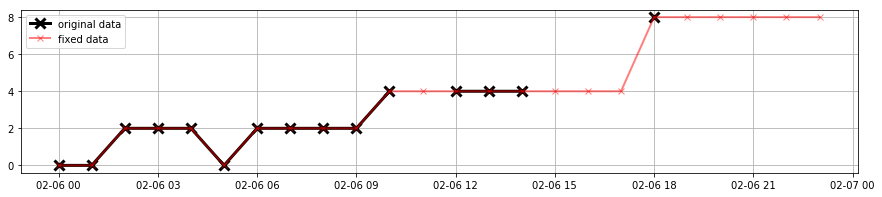

In [ ]:
Image("local/imgs/timeseries-ffill.png")

Using the weather data from the ASHRAE Kaggle competition that you must have downloaded in the previous task you will have to:

1. Extract the time series for the variable `cloud_coverage` for **site_id=3** and for the **date assigned to you** (execute the cell below). This time series will have 24 values (including missing values).
1. Fill in the missing data by repeating the last seen value as in the example above
1. Report the time series as a Pyton list in the variable `fixed_ts` below

Again, use any tool of your choice to generate your result

In [ ]:
from local.lib import labutils
_, date = labutils.biddate_for_student(student.user_id)
print ("your date       ", date)

your date        2016-02-04


#### fill in your fixed time series

In [ ]:
# Importando el dataframe
weather_train=pd.read_csv("weather_train.csv") 

##################### Filtrado #################################
# Transformamos la columna de fechas a el indice del daraframe
weather_train.index = pd.to_datetime(weather_train.timestamp)
# Se filtran aquellos que cumplen con la fecha
weather_train=weather_train.loc[date]
# se filtra la tabla para obtener solo los que cumplen con ese side_id
weather_train=weather_train[weather_train.site_id==3]
# Borrar columna repetida
weather_train=weather_train.set_index('timestamp')

weather_train

,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
timestamp,,,,,,,,
2016-02-04 00:00:00,3,13.3,6.0,12.2,0.0,1011.9,200.0,5.7
2016-02-04 01:00:00,3,13.3,NaN,12.2,0.0,NaN,190.0,5.1
2016-02-04 02:00:00,3,13.3,NaN,12.8,0.0,1012.9,180.0,4.6
2016-02-04 03:00:00,3,13.3,8.0,12.8,0.0,1012.5,190.0,5.7
2016-02-04 04:00:00,3,11.7,9.0,11.7,0.0,1012.4,190.0,4.6
2016-02-04 05:00:00,3,12.8,NaN,12.2,-1.0,1012.2,180.0,6.2
2016-02-04 06:00:00,3,13.9,8.0,13.9,-1.0,1011.8,190.0,4.1
2016-02-04 07:00:00,3,13.3,NaN,13.3,3.0,1011.4,190.0,3.1
2016-02-04 08:00:00,3,12.2,9.0,12.2,3.0,1011.9,190.0,4.6


In [ ]:
# Tomo solo la columna que me interesa
col=weather_train['cloud_coverage']
# Completo los NaN con el anterior
col.ffill(inplace=True)
# Convierto la columna a lista
fixed_ts = col.tolist()
col.tolist()

[6.0,
 6.0,
 6.0,
 8.0,
 9.0,
 9.0,
 8.0,
 8.0,
 9.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0]

**submit your answer**

In [ ]:
student.submit_task(globals(), task_id="task_02");

## Task 3. Build a time series predictive dataset

You will now build a predictive dataset for a single time series. This dataset can later be used with predictive models. The machine learning task we will try to adress is the following:

> **Given three consecutive points of a time series, we want a model to predict the next one.**

Starting from a time series (a list of of $n$ numbers) you will have to build a dataset such as in the following example



[44 45 42 38 47 45 46 44 47 52 53 48 46 42 42 34 30 27 24 24]


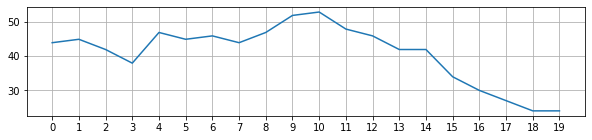

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ts = np.r_[44, 45, 42, 38, 47, 45, 46, 44, 47, 52, 53, 48, 46, 42, 42, 34, 30, 27, 24, 24]
plt.figure(figsize=(10,2))
plt.xticks(range(len(ts)), range(len(ts)))
plt.grid();
plt.plot(ts)
print (ts)


dataset:

    [[[44, 45, 42], 38],
     [[45, 42, 38], 47],
     [[42, 38, 47], 45],
     [[38, 47, 45], 46],
     [[47, 45, 46], 44],
     [[45, 46, 44], 47],
     [[46, 44, 47], 52],
     [[44, 47, 52], 53],
     [[47, 52, 53], 48],
     [[52, 53, 48], 46],
     [[53, 48, 46], 42],
     [[48, 46, 42], 42],
     [[46, 42, 42], 34],
     [[42, 42, 34], 30],
     [[42, 34, 30], 27],
     [[34, 30, 27], 24]]

observe that each line in the dataset represents one input-output pair, like a sliding window over the time series. 

We created two components:

- a matrix $X$ of dimensions `(len(ts)-n-1,3)` gathering all inputs, in the case above with dimensions `(17,3)`
- a vector $y$ of dimension `(len(ts)-n-1)` gathering each corresponding expected output, in the case above with dimensions `(17)`.

In this task, you will have to:

1. Take the time series you created in the previous task, where you fixed the missing values.
1. Build $X$, $y$ such as above with $n=3$. If your time series has 24 data points, then X dimensions will be (20,3) and y dimensions will be (20)

Again, use any tool of your choice to generate your result.

#### fill in your answer


In [ ]:
n=3
ts=fixed_ts

x1=ts[0:len(ts)-n-1]
x2=ts[1:len(ts)-n]
x3=ts[2:len(ts)-n+1]
X=np.array([x1,x2,x3]).T

y=np.array(ts[3:len(ts)-n+2])

**submit your answer**

In [ ]:
student.submit_task(globals(), task_id="task_03");